In [10]:
# USAGE
# python histogram_with_mask.py --image ../images/beach.png

# Import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [19]:
def plot_histogram(image, title, mask = None):
	# Grab the image channels, initialize the tuple of colors
	# and the figure
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# Loop over the image channels
	for (chan, color) in zip(chans, colors):
		# Create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color = color)
		plt.xlim([0, 256])

In [5]:
# Load the original image and plot a histogram for it
image = cv2.imread("../images/beach.png")
cv2.imshow("Original", image)
cv2.waitKey(0)


255

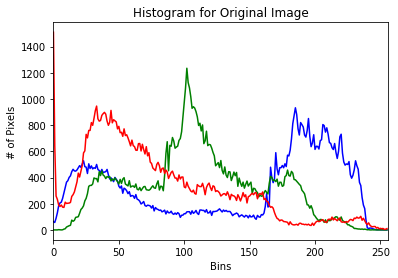

In [20]:
plot_histogram(image, "Histogram for Original Image")
plt.show()

In [14]:
# Construct a mask for our image -- our mask will be BLACK for
# regions we want to IGNORE and WHITE for regions we want to
# EXAMINE. In this example we will be examining the foliage
# of the image, so we'll draw a white rectangle where the foliage
# is
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)


255

In [15]:
# What does masking our image look like?
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)


255

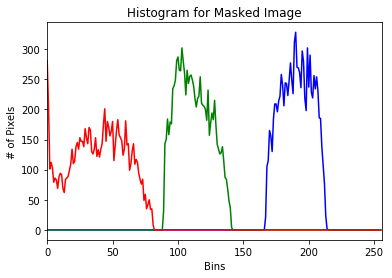

In [21]:
# Let's compute a histogram for our image, but we'll only include
# pixels in the masked region
plot_histogram(image, "Histogram for Masked Image", mask = mask)

# Show our plots
plt.show()